# Lecture 8 - Forming good ML questions from business objectives and Feature Selection

*Hayley Boyce, Wednesday, May 12th, 2021*

**Attribution:** 

- Tomas Beuzen - previous BAIT 509 Lecture 6
- Varada Kolhatkar - Heavily guiding me with Feature Selection


In [1]:
# Importing our libraries
import pandas as pd
import altair as alt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import cross_validate, train_test_split
from sklearn import datasets
from sklearn.linear_model import Ridge

import sys
sys.path.append('code/')
from display_tree import display_tree
from plot_classifier import plot_classifier
import matplotlib.pyplot as plt

# Preprocessing and pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import make_column_transformer

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler

import scipy
from sklearn.model_selection import RandomizedSearchCV

## House Keeping 

- Project instructions are out!
- Time in class for groups! 
 - Assignment 3 was released yesterday!

## Lecture Learning Objectives 

- In the context of supervised learning, form statistical questions  from business questions/objectives.
- Understand the different forms your client may expect you to communicate results. 
- Explain the general concept of feature selection.
- Discuss and compare different feature selection methods at a high level.
- Use sklearn's implementation of recursive feature elimination (RFE).
- Implement the forward search algorithm.

## Five Minute Recap/ Lightning Questions 

- What is the name of the function used to bound our values between 0 and 1
- What is the name of the function that gives "hard" predictions?
- What is the name of the function that gives "soft" predictions?
- What is the hyperparameter we learned for Ridge and how does it affect the Fundamental Trade-off?
- What is the hyperparameter we learned for Logistic Regression and how does it affect the Fundamental Trade-off?

### Some lingering questions

- How can we start forming good business questions that can be addressed with Machine Learning? 
- How to select features for our models? 

## Forming statistical questions to answer business objectives

So far you've seen how to solve predictive problems using machine learning but today, we are going to look at the process involved in asking the questions and problems faced by organizations. 


Generally, there are four parts of a machine learning analysis. In order from high to low level:

1. **The business question/objective**
2. **The statistical question/objective**
3. **The data and model**
4. **The data product**

Doing a machine learning analysis is about distilling from the highest level to the lowest level. As such, there are three distillations to keep in mind: 1-2, 2-3, and 3-4:

- **1-2 is about asking the right questions**
- **2-3 is about building a useful model**
- **3-4 is about communicating the results**

<center><img src="https://images.unsplash.com/photo-1511225317751-5c2d61819d58?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=2734&q=80" width="50%"></center>

     
     
    
Note that an analysis isn’t a linear progression through these “steps”; rather, the process is iterative. This is because none of the components are independent. Making progress on any of the three distillations gives you more information as to what the problem is.

We’ll look at each of these distillations in turn.

## (1 - 2) Asking useful statistical questions

- Usually, a company is not served up a machine learning problem, complete with data and a description of the response and predictors.
    - Companies don't exactly know what question is the right question but they do know what they want  to be accomplished. 
- Instead, they’re faced with some high-level objective/question that we’ll call the **business question/objective**.
- This question needs refining to a **statistical question/objective** – one that is directly addressable by machine learning.

Example: 

- My Capstone Case study. 

### Business objectives: examples
- This [altexsoft blog post](https://www.altexsoft.com/blog/business/supervised-learning-use-cases-low-hanging-fruit-in-data-science-for-businesses/) is a great introduction to business use cases of data science/ML
- Examples of business objectives (for which machine learning is a relevant approach)
    - Reduce the amount of spam email received
    - Early prediction of product failure
    - Find undervalued mines
    - Make a transit system more efficient
    - Hire efficient staff

### Refining business objectives to statistical objectives

<img src='https://media.giphy.com/media/bLcMOxvIak4iZieaut/giphy.gif' width="50%"> 

- Statistical objectives need to be specific
- Remember that supervised learning is about predicting a response $Y$ from predictors $X_1,…,X_p$
- So we need to refine our business objectives to a statistical question(s) we can answer
- This typically involves:
    - Identifying the **response variable** ($Y$) that is most aligned with the business objective.
    - Identifying the **data** (observations + features) that will be used for model development/testing.
    - Note: part of this is the task of feature selection (a topic that we've covered briefly) – but, this is also largely, a human decision based on what we think is more informative, as well as a resource questions (what data is actually available?)

### Statistical objectives: examples
Statistical objectives corresponding to the above business objective examples might be:

| Business Objective | Statistical Question |
| :--- | :--- |
| Reduce the amount of spam email received | <ul><li>$Y$ = classifying an email as spam/not spam <li> $X$ = words present in name and the body of email and other metadata (sender email, time, etc.) <li> Cases of spam will be gathered over time as employees identify emails as spam/not spam. The model can be improved as misclassifications are encountered.</ul>
| Early prediction of product failure, (Kickstarter?) | <ul><li>$Y$ = classifying a product as faulty/not faulty <li> $X$ = Relevant features chosen by an expert <li> Data obtained from the test facility</ul>
| Find undervalued mines | <ul><li>$Y$ = total volume of gold and silver at a site <li> $X$ =  concentrations of other minerals found in drill samples, geographic information, historical data, etc <li> Data obtained from mines where total volumes are already known</ul>
| Make a transit system more efficient | <ul><li>$Y$ = predict the time it takes a bus to travel between set stops <li> $X$ = time of day/week/year, weather, etc. <li> Use data from company server tracking bus movements</ul>
| Hire efficient staff | <ul><li>$Y$ = predict monthly sales <li> $X$ = a personality test, years of work experience, field of experience, etc. <li> Use data based on current employees</ul>

### Statistical questions are not the full picture!
- Almost always, the business objective is more complex than the statistical question.
- By refining a business objective to a statistical one, we may lose part of the essence of the business objective.
- It’s important to have a sense of the ways in which your statistical objective falls short, and the ways in which it’s on the mark, so that you keep an idea of the big picture.
- For example, predicting whether a new staff hire will be efficient or not is a useful statistical question, but doesn't consider why a company might be attracting certain applicants, how long staff will remain, how staff work together, etc.

### Statistical objectives unrelated to supervised learning

- We are only focussing on statistical questions related to supervised learning and prediction in this course
- But there are other kinds of questions you can ask too
- Consider the following example

**Business objective**: To gain insight into the productivity of two branches of a company.

Examples of statistical questions:

- **Hypothesis testing**: Is the mean number of sick days per employee different between two branches of a company?
    - Supervised learning doesn’t cover testing for differences.
- **Unsupervised learning**: What is the mean sentiment of the internal discussion channels from both branches?
    - There is no data of feature + response here, as required by supervised learning (by definition).
- **Statistical inference**: Estimate the mean difference in monthly revenue generated by both branches, along with how certain you are with that estimate.
    - Supervised learning typically isn’t concerned about communicating how certain your estimate is. (BUT it should be and changes are being made to change this!)  

## (2 - 3) Building a useful model
- This is really the main focus of this course, This is the meat/beyond meat patty in your burger! 
- This involves using ML algorithms (kNN, loess, decision trees, etc) to build a predictive model from data
- You always should include a baseline model to assess how well the models you build are giving you some leg up. 
- A simple model like logistic regression does as well as a more complex approach! At the very least, they can help guide you on what more complex approaches to take next.

## (3 - 4) Communicating results

- So you've distilled your business objectives to a statistical question.
- You've developed a model to answer the statistical question.
- Now your model needs to be delivered and used by others (or your future self)!
- The final delivery is often called "the data product" because it may consist of a variety of things:
    - a report
    - a presentation
    - an app
    - a dashboard
    - a software package/pipeline
- Sometimes the client requests a specific data product -> But note that their suggestion might not always be the best option. 
    - Perhaps they request a report and presentation communicating your findings, when a more appropriate product also includes an interactive app that allows them to explore your findings for themselves.
- Either way, the key here is communication. Two import challenges (relevant to your final project):
    - Using appropriate language: there is a lot of jargon in ML, the key is to talk more about the output and the general idea of your model(s), but not machine learning or statistical jargon.
    - Communication with visual design: this is about choosing what visuals are the most effective for communicating. -> Plug: https://viz-learn.mds.ubc.ca/en/
- Usually, the first step is to set up a framework for your data product. For a report, this means outlining what you intend to write about, and where.
- Showing it to your client is useful as a sanity check to see that you’re about to produce something that the client currently sees as being potentially useful.

## Let's Practice 

1. What question is usually more complex?
2. What model needs to be made for all problems?
3. In supervised learning, once we have our business objective, part of our statistical question is identifying what?

**True or False:**
4. When writing your reports, it's important to consider who is reading it.   
5. Sometimes you may need to dig a little to figure out exactly what the client wants.    
6. In supervised learning, we should take into consideration the uncertainty of our models.    

## Feature Selection 

### Motivation 

Remember the curse of dimensionality? 

<img src='imgs/curse.png' width="50%"> 

We spoke about this briefly when we discussed $k$-nn and how when we add many different dimensions (features) it can confuse the model with any irrelevant features and the model can disintegrate into predictions no better than random guessing.
Reasons like this are why we need to be careful about which features we include.

Reasons like this is why we need to be careful about which features we include. 

When we choose the best set of features we call this **Feature Selection**. 

Feature selection a lot of the time can be done using domain knowledge and manually however we can also use tools that help us either tell us:

- which features are most important to a model 
- or that can select a number of features that will result with the optimal validation score. 

In [2]:
cities_df = pd.read_csv("data/canada_usa_cities.csv")
train_df, test_df = train_test_split(cities_df, test_size=0.2, random_state=123)
X_train, y_train = train_df.drop(columns=["country"], axis=1), train_df["country"]
X_test, y_test = test_df.drop(columns=["country"], axis=1), test_df["country"]

train_df.head()

,longitude,latitude,country
160,-76.4813,44.2307,Canada
127,-81.2496,42.9837,Canada
169,-66.0580,45.2788,Canada
188,-73.2533,45.3057,Canada
187,-67.9245,47.1652,Canada


### Feature importance 

Remember our Decision Tree models? Well, we can find out which features are most important in a model using an attribute called `feature_importances_`.

In [3]:
dt_model = DecisionTreeClassifier(max_depth=5)
dt_model.fit(X_train, y_train)
dt_model.feature_importances_

array([0.27718465, 0.72281535])

Here we can see that most of the importance is on the column `latitude`. 

In [4]:
X_train.columns

Index(['longitude', 'latitude'], dtype='object')

If we graph this, the root of the decision tree will usually reflect the top feature. Just like we can see here:

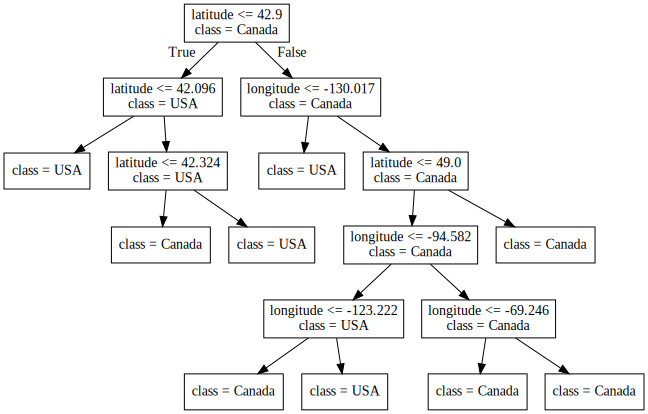

In [5]:
sys.path.append('code/')
from display_tree import display_tree
display_tree(X_train.columns, dt_model, "imgs/decision_tree")

### New housing data 

I know at this point you are probably annoyed and bored of housing data, but good, interesting open-source data is hard to come by. For this example I really want to show you an example with LOTS of features. 

For this example, I really want to show you an example with LOTS of features.
Here is (yet another) housing dataset we acquired from [this GitHub repo](https://github.com/melindaleung/Ames-Iowa-Housing-Dataset), originally created by Dean De Cock. (We are using the raw data so we do not need to store it and import it simply from the url)


**Attribution:** 

The Ames Housing dataset was compiled by Dean De Cock for use in data science education. 

His publication can be found [here](http://jse.amstat.org/v19n3/decock.pdf).

In [6]:
ames_df = pd.read_csv('https://raw.githubusercontent.com/melindaleung/Ames-Iowa-Housing-Dataset/master/data/ames%20iowa%20housing.csv', index_col=0)
ames_df = ames_df[(ames_df['SaleCondition'] != 'Alloca') &  (ames_df['SaleCondition'] != 'AdjLand')]
ames_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [7]:
ames_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1444 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1444 non-null   int64  
 1   MSZoning       1444 non-null   object 
 2   LotFrontage    1187 non-null   float64
 3   LotArea        1444 non-null   int64  
 4   Street         1444 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1444 non-null   object 
 7   LandContour    1444 non-null   object 
 8   Utilities      1444 non-null   object 
 9   LotConfig      1444 non-null   object 
 10  LandSlope      1444 non-null   object 
 11  Neighborhood   1444 non-null   object 
 12  Condition1     1444 non-null   object 
 13  Condition2     1444 non-null   object 
 14  BldgType       1444 non-null   object 
 15  HouseStyle     1444 non-null   object 
 16  OverallQual    1444 non-null   int64  
 17  OverallCond    1444 non-null   int64  
 18  YearBuil

Here, we use `.info()` to identify our categorical and numeric features. I split my features and identify my target. 

The target variable for this question is `SaleCondition` and we are doing classification.

In [8]:
train_df, test_df = train_test_split(ames_df, test_size=0.2, random_state=77)

X_train = train_df.drop(columns=['SaleCondition', 'PoolQC', 'MiscFeature', 'Alley'])
X_test =  test_df.drop(columns=['SaleCondition', 'PoolQC', 'MiscFeature', 'Alley'])

y_train = train_df[['SaleCondition']]
y_test = test_df[['SaleCondition']]

 Note, you should be looking at these individually but I'm being a little lazy here. 

In [9]:
numeric_features = X_train.select_dtypes('number').columns.to_list()
categorical_features = X_train.select_dtypes('object').columns.to_list()

Here are our numeric features:

In [10]:
numeric_features

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

And here are our categorical features:

In [11]:
categorical_features

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'Fence',
 'SaleType']

Next, we need to make our pipelines and column transformer. 

We can also cross-validate, but here my main goal is to show you how to get our feature importances from our pipeline! 

In [12]:
numeric_pipe = make_pipeline(SimpleImputer(strategy='median'),
                            StandardScaler())
categoric_pipe = make_pipeline(SimpleImputer(strategy="constant", fill_value="missing"),
                            OneHotEncoder(dtype=int, handle_unknown="ignore"))

preprocessor = make_column_transformer((numeric_pipe, numeric_features),
                                       (categoric_pipe, categorical_features))

main_pipe = make_pipeline(preprocessor, DecisionTreeClassifier())


scores = cross_validate(main_pipe, X_train, y_train, return_train_score=True)

pd.DataFrame(scores).mean()

fit_time       0.065380
score_time     0.011080
test_score     0.863203
train_score    1.000000
dtype: float64

Once we fit our pipeline outside of `cross_validate()` we can use `feature_importances_` to get our percentages. 

In [13]:
main_pipe.fit(X_train, y_train)
feats_importance = main_pipe.named_steps['decisiontreeclassifier'].feature_importances_
feats_importance

array([0.00000000e+00, 7.23315641e-03, 2.91085233e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.83693524e-03, 0.00000000e+00,
       1.84869255e-02, 2.66956175e-03, 1.65083390e-02, 1.55512530e-02,
       1.40048136e-02, 2.53914832e-03, 0.00000000e+00, 2.13885932e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       5.17790495e-03, 0.00000000e+00, 1.78026200e-02, 0.00000000e+00,
       1.97622045e-02, 0.00000000e+00, 1.50413025e-02, 1.23892619e-02,
       6.80079202e-03, 8.81379235e-03, 0.00000000e+00, 3.83693524e-03,
       0.00000000e+00, 0.00000000e+00, 1.04782031e-02, 2.35837926e-02,
       4.72446791e-02, 0.00000000e+00, 0.00000000e+00, 5.26208261e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.31655214e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.83693524e-03, 0.00000000e+00,
      

The problem here, is we don't know which value corresponds to which feature! 

Let's first take a look at how many features we have now after preprocessing. 

In [14]:
len(feats_importance)

286

Ok 286, let's get the feature names after preprocessing.  

We can obtain the categorical features and combine them with the  numeric features.

In [15]:
cat_feats = preprocessor.named_transformers_['pipeline-2'].named_steps[
    'onehotencoder'].get_feature_names(categorical_features).tolist()

In [16]:
all_feat_names = numeric_features + cat_feats

We can see now that we have the name number of feature names as we do feature_importance values. 

In [17]:
len(all_feat_names)

286

Let's get them into a dataframe now and sort them:

In [18]:
features_df = pd.DataFrame(data = [all_feat_names,
                                feats_importance.flatten()]).T.rename(columns={0:'feature', 1:'feature_importance'})
features_df.sort_values('feature_importance',key= abs, ascending=False)


,feature,feature_importance
283,SaleType_New,0.465536
277,SaleType_COD,0.0590743
36,SalePrice,0.0472447
2,LotArea,0.0291085
35,YrSold,0.0235838
...,...,...
119,RoofStyle_Gambrel,0
121,RoofStyle_Mansard,0
122,RoofStyle_Shed,0
123,RoofMatl_ClyTile,0


We can see that `SaleType_New` is the most important feature in our model.

From here we can decide to manually remove some of the columns that are not taken into consideration as much.... or we can instead use a tool to help us! 

Enter - **Recursive feature elimination**

### Recursive feature elimination - RFE 

We can use feature importances to eliminate unimportant features.

The basic idea with recursive feature elimination is we: 
1. We decide $k$ - the number of features to select.
2. Assign importances to features, e.g. by fitting a model and looking at coef_ or feature_importances_.
3. Remove the least important feature.
4. Repeat steps 2-3 until only $k$ features are remaining.

**Note that this is not the same as just removing all the less important features in one shot!**

Let's take a look at how we can do this. 

First we import `RFE` from `sklearn.feature_selection`: 

In [19]:
from sklearn.feature_selection import RFE

Now instead of simply using `DecisionTreeClassifier`, we can wrap it around the `RFE` function and specify how many features we want with `n_features_to_select`. 

Here I'm capping the number of features to 30 (an arbitrary number I picked).

This is going to take about 1-2 minutes to run because now, it's recursively removing 1 feature at a time and cross-validating on the final result.


<img src='imgs/waiting2.png' width="50%"> 

In [20]:
main_pipe = make_pipeline(preprocessor, RFE(DecisionTreeClassifier(), 
                                            n_features_to_select=30))

scores = cross_validate(main_pipe, X_train, y_train, return_train_score=True)

pd.DataFrame(scores)

,fit_time,score_time,test_score,train_score
0,7.691630,0.010339,0.887446,1.0
1,6.324541,0.010500,0.844156,1.0
2,7.196010,0.010860,0.835498,1.0
3,6.879073,0.012072,0.883117,1.0
4,7.689723,0.010658,0.883117,1.0


In [21]:
pd.DataFrame(scores).mean()

fit_time       7.156195
score_time     0.010886
test_score     0.866667
train_score    1.000000
dtype: float64

Looking at this mean validation score compared to when the model was using all the features, we can see it increased a bit! 

But now our next question is how do we set $k$? How do we know how many features is the optimal amount... Well, you guessed it! There is a tool for that too! 

### RFECV

You can find the optimal number of features using cross-validation with `RFECV` where the optimal $k$ value is selected based on the highest validation score. 

You would definitely not want to use the training score! - Why?
 > Because with training score the more features you add the higher the score, this isn't the case with validation score. 
 
We can import `RFECV` from `sklearn.feature_selection` like we did for `RFE`. 

In [22]:
from sklearn.feature_selection import RFECV

Instead of `RFE` now we simply use `RFECV` in our pipeline and we do not need to specify the argument `n_features_to_select` like we did with `RFE` since $k$ is selected based on the highest validation score. 

(*This is also going to take a couple of minutes*)

<img src='imgs/waiting1.png' width="50%"> 



In [23]:
main_pipe = make_pipeline(preprocessor, RFECV(DecisionTreeClassifier(), cv=5))

scores = cross_validate(main_pipe, X_train, y_train, return_train_score=True)

Now we have ~91% for our validation score! 

In [24]:
pd.DataFrame(scores).mean()

fit_time       34.738106
score_time      0.011433
test_score      0.912554
train_score     0.912554
dtype: float64

In [25]:
main_pipe.fit(X_train,y_train)
print(main_pipe.named_steps["rfecv"].support_)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

In [26]:
print("The number of features selected by RFE: ",
      main_pipe.named_steps["rfecv"].n_features_)

The number of features selected by RFE:  1


In [27]:
feature_names = all_feat_names
support = main_pipe.named_steps["rfecv"].support_
RFE_selected_feats = np.array(feature_names)[support]
RFE_selected_feats

array(['SaleType_New'], dtype='<U20')

RFECV selects the features by references their `feature_importances` as well as the validation score after each feature is removed and seeing if it is increasing. 

When a feature is removed and the validation score is no longer increasing, then it stops removing features. 

## Forward Selection 

Unlike with RFE where we start with all our features and gradually remove the leat important ones, **Forward Selection** is a process where we start with no features and gradually add them! 

With RFE we removed the least important feature, whereas with forward selection we add features untill our cross-validation score starts to decreases. 

Forward Selection does not guaranty finding the best features set but reduces many problems.
Computationally cheaper (aka faster!) 
Overfits less


Forward selection is recently implemented in `sklearn` so please make sure it is up to date! You need version 0.24!

In [28]:
from sklearn.feature_selection import SequentialFeatureSelector

We can import it as follows: 

In [29]:
pipe_forward = make_pipeline(preprocessor, 
                             SequentialFeatureSelector(DecisionTreeClassifier(), 
                                                       direction='forward',
                                                       n_features_to_select=20),
                            DecisionTreeClassifier())

Running this next cell is going to take a LONG LONG LONG time. 

<img src='imgs/waiting3.png' width="50%"> 

In [30]:
scores = cross_validate(pipe_forward, X_train, y_train, 
                        return_train_score=True)
pd.DataFrame(scores).mean()

fit_time       76.345720
score_time      0.011630
test_score      0.902165
train_score     0.936147
dtype: float64

## Let's Practice 

1. As we increase features, which score will always increase? 
2. Between `RFE` and `RFECV` which one finds the optimal number of features for us?
3. Which method starts with all our features and iteratively removes them from our model?
4. Which method starts with no features and iteratively adds features?
5. Which method does not take into consideration `feature_importance` when adding/removing features? 

## Extra time? 

Breakout rooms in your project groups! 

Use this time to:

- Meet with your team mates;
- Think about a project - choose the data and business objective.
- Propose a statistical objective to address this.
- Also, elaborate on the statistical objective. What’s your plan for the analysis?

## What We've Learned Today

- How to construct a statistical question from a business objective. 
- What steps are important in building your analysis.
- How to discover important features in your model. 
- the 2 different methods (RFE, Forward selection) to conduct feature selection on your model. 